# Project 4: Clustering 

This project will involve clustering - grouping similar datapoints together - using 2 popular methods K-Means and Agglomerative clustering. 
The goal of this project is to apply clustering techniques to recommend Spotify songs. 

## Inspecting the Data & Data Understanding

In [ ]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [ ]:
data = pd.read_csv('/content/genres_v2.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (19) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
data.shape

(42305, 22)

In [ ]:
data.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,id,uri,track_href,analysis_url,duration_ms,time_signature,genre,song_name,Unnamed: 0,title
0,0.831,0.814,2,-7.364,1,0.4200,0.0598,0.013400,0.0556,0.3890,...,2Vc6NJ9PW9gD9q343XFRKx,spotify:track:2Vc6NJ9PW9gD9q343XFRKx,https://api.spotify.com/v1/tracks/2Vc6NJ9PW9gD...,https://api.spotify.com/v1/audio-analysis/2Vc6...,124539,4,Dark Trap,Mercury: Retrograde,NaN,NaN
1,0.719,0.493,8,-7.230,1,0.0794,0.4010,0.000000,0.1180,0.1240,...,7pgJBLVz5VmnL7uGHmRj6p,spotify:track:7pgJBLVz5VmnL7uGHmRj6p,https://api.spotify.com/v1/tracks/7pgJBLVz5Vmn...,https://api.spotify.com/v1/audio-analysis/7pgJ...,224427,4,Dark Trap,Pathology,NaN,NaN
2,0.850,0.893,5,-4.783,1,0.0623,0.0138,0.000004,0.3720,0.0391,...,0vSWgAlfpye0WCGeNmuNhy,spotify:track:0vSWgAlfpye0WCGeNmuNhy,https://api.spotify.com/v1/tracks/0vSWgAlfpye0...,https://api.spotify.com/v1/audio-analysis/0vSW...,98821,4,Dark Trap,Symbiote,NaN,NaN
3,0.476,0.781,0,-4.710,1,0.1030,0.0237,0.000000,0.1140,0.1750,...,0VSXnJqQkwuH2ei1nOQ1nu,spotify:track:0VSXnJqQkwuH2ei1nOQ1nu,https://api.spotify.com/v1/tracks/0VSXnJqQkwuH...,https://api.spotify.com/v1/audio-analysis/0VSX...,123661,3,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote),NaN,NaN
4,0.798,0.624,2,-7.668,1,0.2930,0.2170,0.000000,0.1660,0.5910,...,4jCeguq9rMTlbMmPHuO7S3,spotify:track:4jCeguq9rMTlbMmPHuO7S3,https://api.spotify.com/v1/tracks/4jCeguq9rMTl...,https://api.spotify.com/v1/audio-analysis/4jCe...,123298,4,Dark Trap,Venom,NaN,NaN


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42305 entries, 0 to 42304
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      42305 non-null  float64
 1   energy            42305 non-null  float64
 2   key               42305 non-null  int64  
 3   loudness          42305 non-null  float64
 4   mode              42305 non-null  int64  
 5   speechiness       42305 non-null  float64
 6   acousticness      42305 non-null  float64
 7   instrumentalness  42305 non-null  float64
 8   liveness          42305 non-null  float64
 9   valence           42305 non-null  float64
 10  tempo             42305 non-null  float64
 11  type              42305 non-null  object 
 12  id                42305 non-null  object 
 13  uri               42305 non-null  object 
 14  track_href        42305 non-null  object 
 15  analysis_url      42305 non-null  object 
 16  duration_ms       42305 non-null  int64 

In [ ]:
data.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,Unnamed: 0
count,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,20780.000000
mean,0.639364,0.762516,5.370240,-6.465442,0.549462,0.136561,0.096160,0.283048,0.214079,0.357101,147.474056,250865.846685,3.972580,10483.970645
std,0.156617,0.183823,3.666145,2.941165,0.497553,0.126168,0.170827,0.370791,0.175576,0.233200,23.844623,102957.713571,0.268342,6052.359519
min,0.065100,0.000243,0.000000,-33.357000,0.000000,0.022700,0.000001,0.000000,0.010700,0.018700,57.967000,25600.000000,1.000000,0.000000
25%,0.524000,0.632000,1.000000,-8.161000,0.000000,0.049100,0.001730,0.000000,0.099600,0.161000,129.931000,179840.000000,4.000000,5255.750000
50%,0.646000,0.803000,6.000000,-6.234000,1.000000,0.075500,0.016400,0.005940,0.135000,0.322000,144.973000,224760.000000,4.000000,10479.500000
75%,0.766000,0.923000,9.000000,-4.513000,1.000000,0.193000,0.107000,0.722000,0.294000,0.522000,161.464000,301133.000000,4.000000,15709.250000
max,0.988000,1.000000,11.000000,3.148000,1.000000,0.946000,0.988000,0.989000,0.988000,0.988000,220.290000,913052.000000,5.000000,20999.000000


These are interesting statistics. Looks like the songs vary a lot in the features.

In [ ]:
data.isna().sum()[data.isna().sum() > 0]

song_name     20786
Unnamed: 0    21525
title         21525
dtype: int64

From this we can see that approximate 50% of songs are unnamed.

In [ ]:
data['genre'].value_counts()

Underground Rap    5875
Dark Trap          4578
Hiphop             3028
trance             2999
trap               2987
techhouse          2975
dnb                2966
psytrance          2961
techno             2956
hardstyle          2936
RnB                2099
Trap Metal         1956
Rap                1848
Emo                1680
Pop                 461
Name: genre, dtype: int64

Text(0, 0.5, 'Genre')

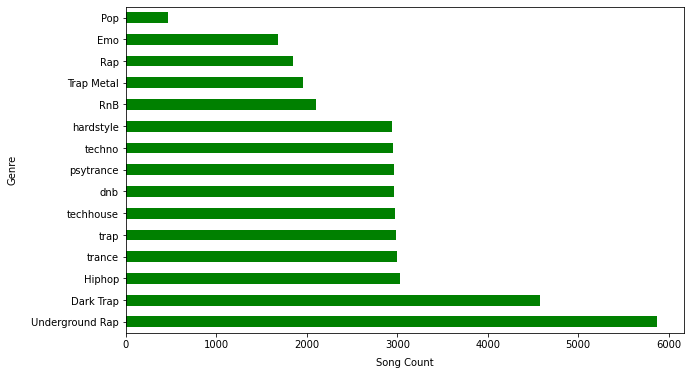

In [ ]:
data['genre'].value_counts().plot(kind='barh', figsize=(10, 6), rot=0, color='green')
plt.xlabel("Song Count", labelpad=8)
plt.ylabel("Genre", labelpad=14)

There are a lot of Underground Rap songs and Dark Trap in this dataset. 

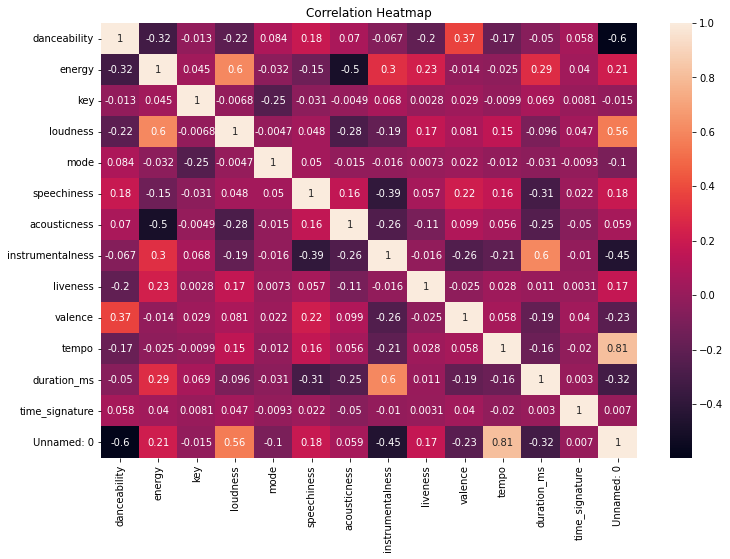

In [ ]:
# correlation heatmap between features
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(),annot=True)
plt.title('Correlation Heatmap')
plt.show()

From the correlation heatmap, there are no 2 features that are strongly correlated to each other, maybe except energy and loudness.

Let's visualize the main features of different genres.

In [ ]:
numeric_data = data._get_numeric_data()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f68b3fbcf50>,
      dtype=object)

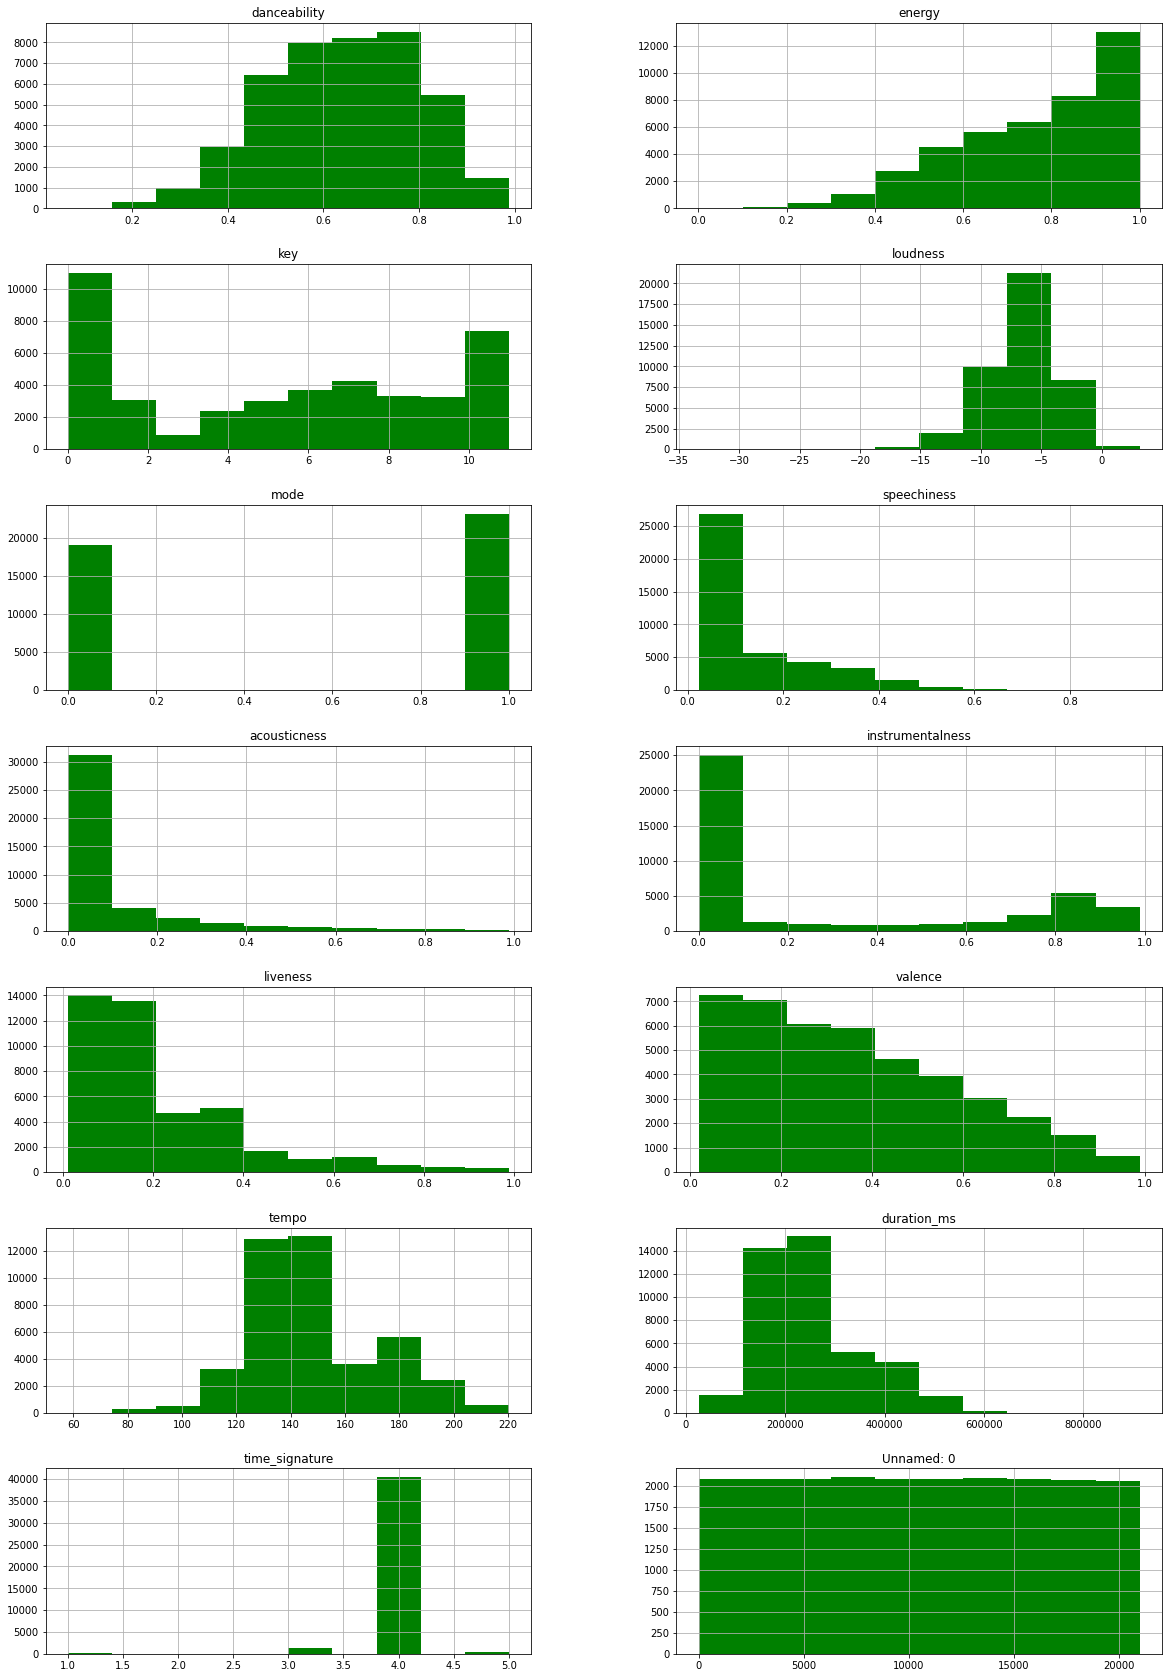

In [ ]:
numeric_data.hist(layout=(7,2),figsize=(20, 30),color='green')

<Figure size 1440x2160 with 0 Axes>

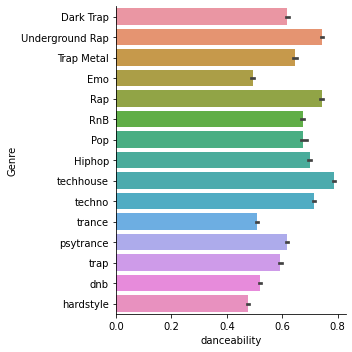

<Figure size 1440x2160 with 0 Axes>

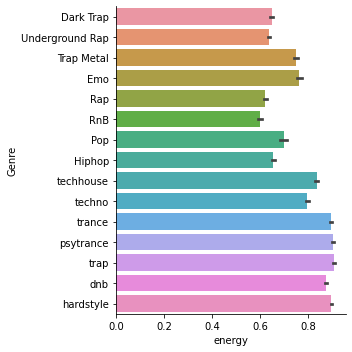

<Figure size 1440x2160 with 0 Axes>

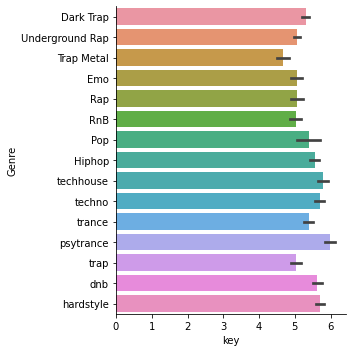

<Figure size 1440x2160 with 0 Axes>

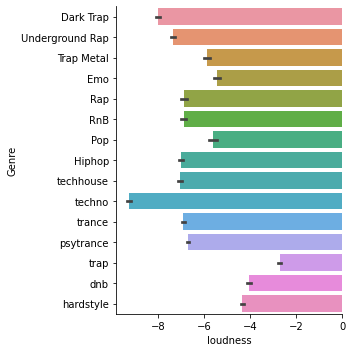

<Figure size 1440x2160 with 0 Axes>

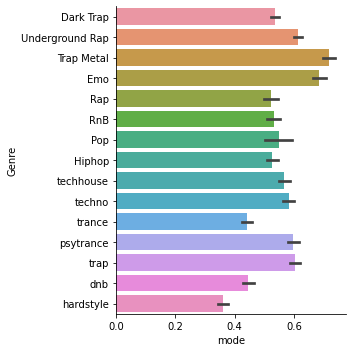

<Figure size 1440x2160 with 0 Axes>

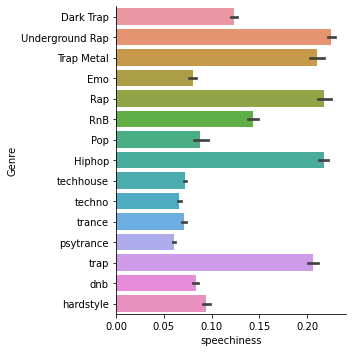

<Figure size 1440x2160 with 0 Axes>

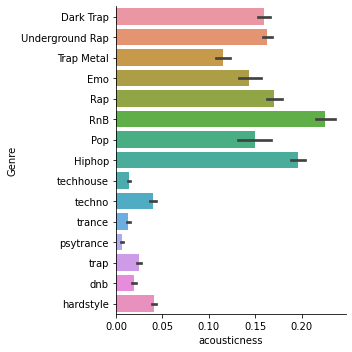

<Figure size 1440x2160 with 0 Axes>

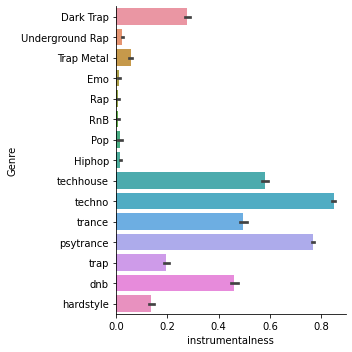

<Figure size 1440x2160 with 0 Axes>

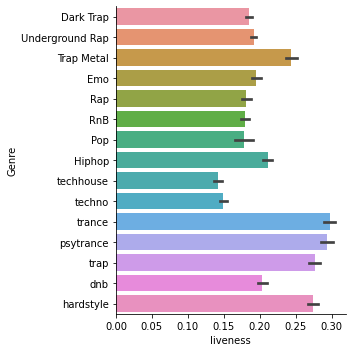

<Figure size 1440x2160 with 0 Axes>

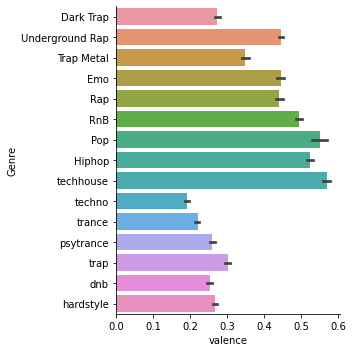

<Figure size 1440x2160 with 0 Axes>

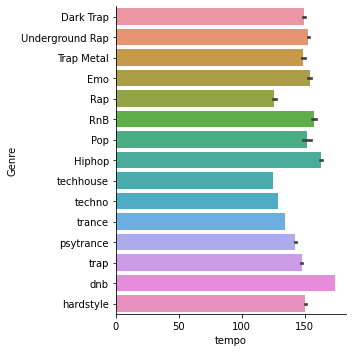

<Figure size 1440x2160 with 0 Axes>

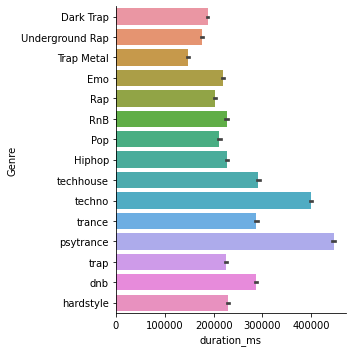

In [ ]:
features = ['danceability', 'energy', 'key', 'loudness', 'mode','speechiness','acousticness', 'instrumentalness', 'liveness','valence','tempo','duration_ms']
def plotting(feature):
    plt.figure(figsize=(20, 30))
    plot = sns.catplot(x=feature, y='genre', data=data, kind='bar')
    plot.set_ylabels('Genre')
    plt.show()
    
for x in features:
    plotting(x)

## Preprocessing

In [ ]:
# drop unecessary columns
data = data.drop(['type','uri','track_href','analysis_url','id','song_name','Unnamed: 0','title', 'genre'],axis=1)

In [ ]:
data

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.831,0.814,2,-7.364,1,0.4200,0.059800,0.013400,0.0556,0.3890,156.985,124539,4
1,0.719,0.493,8,-7.230,1,0.0794,0.401000,0.000000,0.1180,0.1240,115.080,224427,4
2,0.850,0.893,5,-4.783,1,0.0623,0.013800,0.000004,0.3720,0.0391,218.050,98821,4
3,0.476,0.781,0,-4.710,1,0.1030,0.023700,0.000000,0.1140,0.1750,186.948,123661,3
4,0.798,0.624,2,-7.668,1,0.2930,0.217000,0.000000,0.1660,0.5910,147.988,123298,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
42300,0.528,0.693,4,-5.148,1,0.0304,0.031500,0.000345,0.1210,0.3940,150.013,269208,4
42301,0.517,0.768,0,-7.922,0,0.0479,0.022500,0.000018,0.2050,0.3830,149.928,210112,4
42302,0.361,0.821,8,-3.102,1,0.0505,0.026000,0.000242,0.3850,0.1240,154.935,234823,4
42303,0.477,0.921,6,-4.777,0,0.0392,0.000551,0.029600,0.0575,0.4880,150.042,323200,4


## Modeling

To find out the optimal k for K-Means clustering, I will use the Elbow method to calculate Within-Cluster-Sum of Squared Errors (WSS) for different values of k.

In [ ]:
# import libraries
from sklearn.cluster import KMeans

In [ ]:
# calculate inertia for each k value (Sum of squared distances of samples to their closest cluster center)
distortions = []
K = range(1,10)
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data)
    distortions.append(kmeans.inertia_)

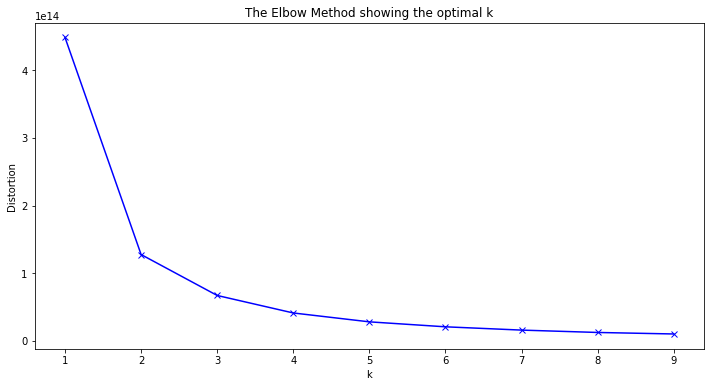

In [ ]:
# plot the elbow method results
plt.figure(figsize=(12,6))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

The elbow graph shows that the optimal value for k is 3, so I will use 3 as the number of clusters.

In [ ]:
# Use K-means clustering model
kmeans = KMeans(n_clusters=3, max_iter=100)
kmeans.fit(data)

KMeans(max_iter=100, n_clusters=3)

## Clustering Analysis

In [ ]:
data['clusterID'] = kmeans.labels_

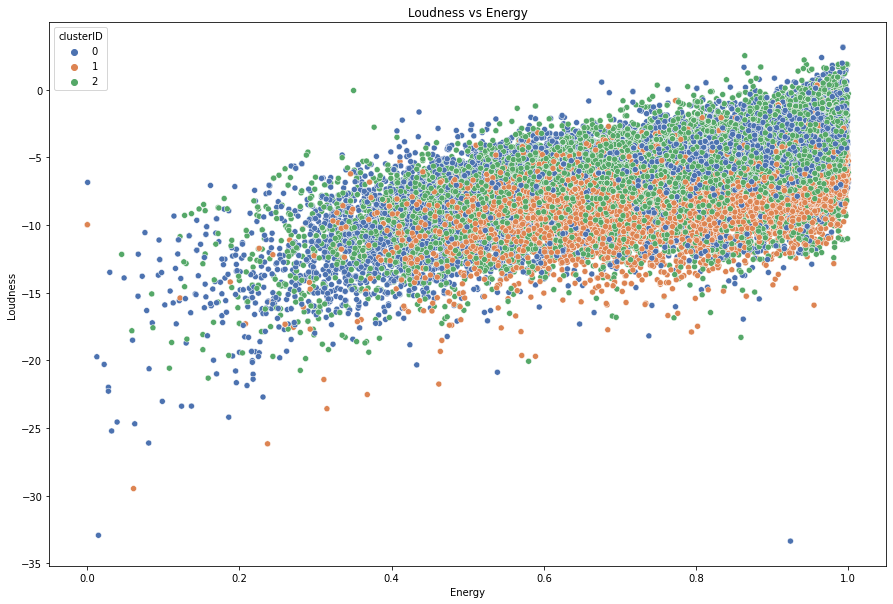

In [ ]:
plt.figure(figsize=(15,10))
sns.scatterplot(x = 'energy',y = 'loudness', data = data, hue = 'clusterID',palette='deep')
plt.title('Loudness vs Energy')
plt.xlabel('Energy')
plt.ylabel('Loudness')
plt.show()

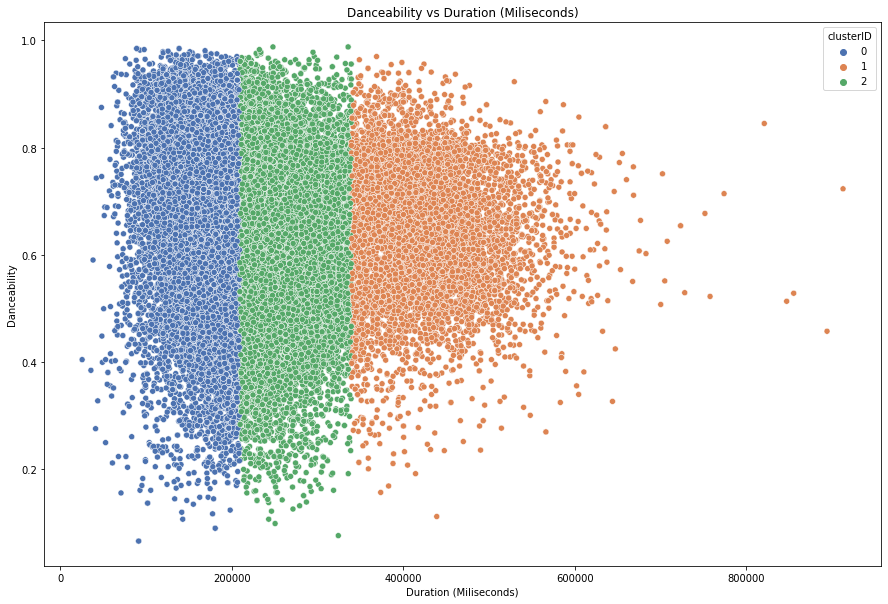

In [ ]:
plt.figure(figsize=(15,10))
sns.scatterplot(x = 'duration_ms',y = 'danceability', data = data, hue = 'clusterID',palette='deep')
plt.title('Danceability vs Duration (Miliseconds)')
plt.xlabel('Duration (Miliseconds)')
plt.ylabel('Danceability')
plt.show()

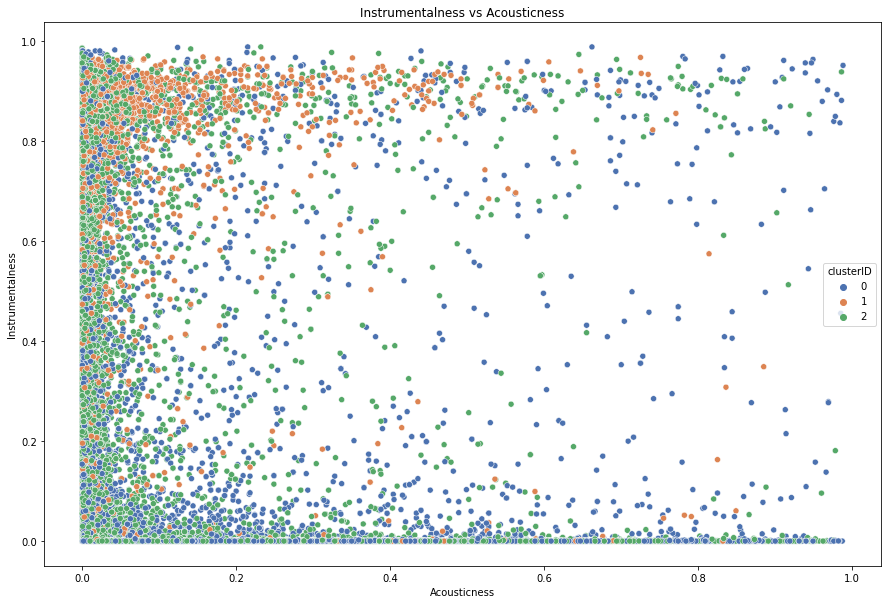

In [ ]:
plt.figure(figsize=(15,10))
sns.scatterplot(x = 'acousticness',y = 'instrumentalness', data = data, hue = 'clusterID',palette='deep')
plt.title('Instrumentalness vs Acousticness')
plt.xlabel('Acousticness')
plt.ylabel('Instrumentalness')
plt.show()

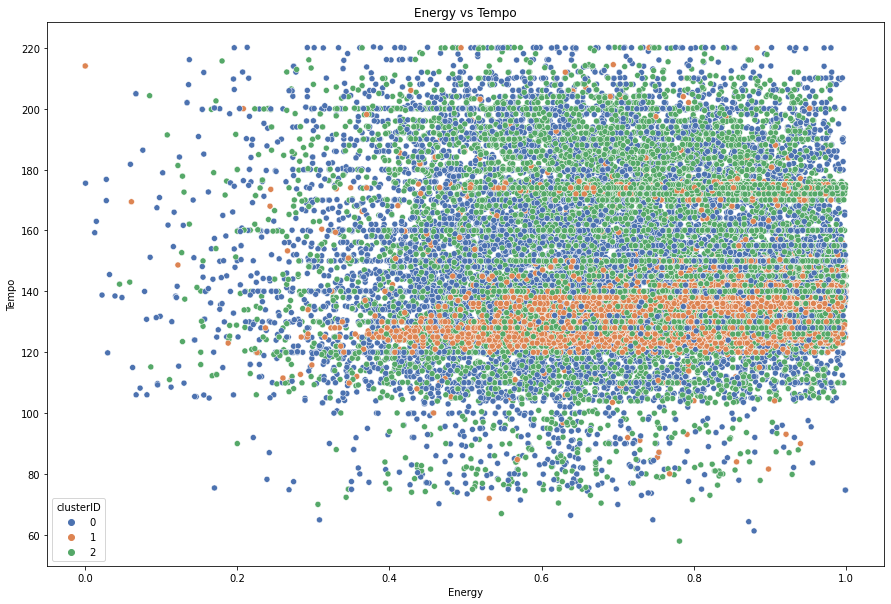

In [ ]:
plt.figure(figsize=(15,10))
sns.scatterplot(x = 'energy',y = 'tempo', data = data, hue = 'clusterID',palette='deep')
plt.title('Energy vs Tempo')
plt.xlabel('Energy')
plt.ylabel('Tempo')
plt.show()

## Conclusion